In [83]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
data = pd.read_csv('test_data.csv')

In [5]:
data.head()

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,brain,ependymoma,12.601370,8.873161,9.214310,9.690334,4.341822,7.924622,6.482649,6.499633,...,11.330031,10.967963,13.693713,13.721795,5.254671,4.749096,3.968936,3.548965,4.554688,4.584465
1,brain,ependymoma,12.921025,8.620507,7.238575,8.245388,3.682762,8.027397,7.575340,5.517496,...,12.758212,12.202741,13.985927,13.684496,5.013313,4.618019,3.963455,3.741682,4.617641,4.374241
2,normal,normal,11.046641,8.458561,6.425059,8.770478,6.532255,7.132320,7.857738,5.823012,...,13.100610,12.697922,14.362506,14.061722,4.950459,4.612189,4.010441,3.866341,4.471244,4.766970
3,brain,ependymoma,12.369828,8.863015,6.623091,8.319927,4.084849,8.024815,7.981879,6.000366,...,12.482283,11.903074,13.991402,13.792137,4.936046,4.616858,3.701871,3.678101,4.555495,4.379911
4,normal,normal,11.299893,8.286180,6.993723,8.770720,4.026220,7.585630,7.870659,5.819242,...,13.276996,12.869971,14.476079,14.273778,5.100812,4.268341,3.989762,3.511990,4.644976,4.522790


In [21]:
data['classification'] = data['cancer_type'].apply(lambda x: 'normal' if x == 'normal' else 'cancer')

In [25]:
data['classification']

0      cancer
1      cancer
2      normal
3      cancer
4      normal
        ...  
165    cancer
166    cancer
167    normal
168    normal
169    normal
Name: classification, Length: 170, dtype: object

In [7]:
ground_truth = data['cancer_type']

In [27]:
cancer_classifier = data['classification']

In [9]:
ground_truth

0        brain
1        brain
2       normal
3        brain
4       normal
        ...   
165    bladder
166    bladder
167     normal
168     normal
169     normal
Name: cancer_type, Length: 170, dtype: object

In [39]:
ground_truth.nunique()

13

In [29]:
cancer_classifier

0      cancer
1      cancer
2      normal
3      cancer
4      normal
        ...  
165    cancer
166    cancer
167    normal
168    normal
169    normal
Name: classification, Length: 170, dtype: object

In [31]:
cluster_data = data.drop(columns = ['cancer_type', 'type', 'classification'])

In [33]:
cluster_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,12.601370,8.873161,9.214310,9.690334,4.341822,7.924622,6.482649,6.499633,5.368997,6.634785,...,11.330031,10.967963,13.693713,13.721795,5.254671,4.749096,3.968936,3.548965,4.554688,4.584465
1,12.921025,8.620507,7.238575,8.245388,3.682762,8.027397,7.575340,5.517496,6.761186,5.180190,...,12.758212,12.202741,13.985927,13.684496,5.013313,4.618019,3.963455,3.741682,4.617641,4.374241
2,11.046641,8.458561,6.425059,8.770478,6.532255,7.132320,7.857738,5.823012,4.491771,7.252599,...,13.100610,12.697922,14.362506,14.061722,4.950459,4.612189,4.010441,3.866341,4.471244,4.766970
3,12.369828,8.863015,6.623091,8.319927,4.084849,8.024815,7.981879,6.000366,5.452527,5.422245,...,12.482283,11.903074,13.991402,13.792137,4.936046,4.616858,3.701871,3.678101,4.555495,4.379911
4,11.299893,8.286180,6.993723,8.770720,4.026220,7.585630,7.870659,5.819242,4.631284,5.078618,...,13.276996,12.869971,14.476079,14.273778,5.100812,4.268341,3.989762,3.511990,4.644976,4.522790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,6.533818,3.095183,6.540493,6.361546,2.295276,4.636936,4.932149,2.955106,5.199770,2.495139,...,11.364050,10.985695,13.735517,13.364968,7.703983,3.172810,4.933504,2.236060,2.343445,2.220485
166,5.657621,3.159085,3.978410,7.174108,2.742771,4.937159,5.861396,3.510067,2.972037,2.756564,...,13.084227,12.915690,14.376607,14.033410,9.916877,3.746717,5.836157,2.485093,2.626120,2.635610
167,6.515137,2.979765,3.940801,7.209822,2.525715,4.822728,5.517274,3.495081,3.780623,2.694867,...,12.660566,12.586157,14.093004,13.682465,9.405094,3.729148,6.286082,2.287532,2.712309,2.546700
168,5.998170,3.165824,4.268922,7.198874,2.738943,4.721181,5.517444,3.193544,3.143453,2.709082,...,12.069660,12.057527,13.757772,13.404077,7.642801,3.296269,3.261484,2.447714,2.889734,2.746983


In [41]:
kmeans13 = KMeans(n_clusters = 13) # ground truth has 13 different labels
kmeans2 = KMeans(n_clusters = 2) # cancer or not cancer

In [43]:
type_pred = kmeans13.fit_predict(cluster_data)
cancer_pred = kmeans2.fit_predict(cluster_data)

C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
label_encoder = LabelEncoder()
ground_truth_encoded = label_encoder.fit_transform(ground_truth)

In [66]:
cancer_classifier_encoded = label_encoder.fit_transform(cancer_classifier)

## Adjusted Rand Index

In [45]:
ari_types = adjusted_rand_score(type_pred, ground_truth)
ari_cancer = adjusted_rand_score(cancer_pred, cancer_classifier)

print(f'Adjusted Rand Index for All Types: {ari_types}')
print(f'Adjusted Rand Index for Cancer or Not Cancer: {ari_cancer}')

Adjusted Rand Index for All Types: 0.3242929866864086
Adjusted Rand Index for Cancer or Not Cancer: -0.02118285294864544


## Silhouette Score

In [49]:
sil_types = silhouette_score(cluster_data, type_pred)
sil_cancer = silhouette_score(cluster_data, cancer_pred)

print(f'Silhouette Score for All Types: {sil_types}')
print(f'Silhouette Score for Cancer or Not Cancer: {sil_cancer}')

Silhouette Score for All Types: 0.2812058046895608
Silhouette Score for Cancer or Not Cancer: 0.2170431391133915


## Confusion Matrix

In [68]:
cm_types = confusion_matrix(type_pred, ground_truth_encoded)
cm_cancer = confusion_matrix(cancer_pred, cancer_classifier_encoded)

print('Confusion Matrix for All Types:')
print(cm_types)

print('Confusion Matrix for Cancer or Not Cancer:')
print(cm_cancer)

Confusion Matrix for All Types:
[[ 0  3 11  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  6  0]
 [ 0  0  0 14  0  0  0  0  4  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  4  0  0]
 [ 0  0  0  0  0  0  9  3  6  0  1  0  0]
 [ 0  1  0  0  2  0  0  0  3  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0 10]
 [ 0  0  0  3  0  0  0  0  5  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  1  0  0  0  0]]
Confusion Matrix for Cancer or Not Cancer:
[[26  9]
 [92 43]]


## Using PCA First

In [75]:
np.random.seed(42)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

pca40 = PCA(n_components = 40) # 40 dimensions
cluster_data_40 = pca40.fit_transform(cluster_data_scaled)

pca40_kmeans13 = KMeans(n_clusters = 13)
pca40_kmeans2 = KMeans(n_clusters = 2)
pca40_types_clustered = pca40_kmeans13.fit_predict(cluster_data_40)
pca40_cancer_clustered = pca40_kmeans2.fit_predict(cluster_data_40)

# Evaluation

# Adjusted Rand Index
ari_pca40_types = adjusted_rand_score(ground_truth, pca40_types_clustered)
ari_pca40_cancer = adjusted_rand_score(ground_truth, pca40_cancer_clustered)

print('Adjusted Rand Index Results After PCA with 40 Dimensions')
print(f'Cancer Types: {ari_pca40_types}')
print(f'Cancer or Not Cancer: {ari_pca40_cancer}')

# Silhouette Score
sil_pca40_types = silhouette_score(cluster_data_40, pca40_types_clustered)
sil_pca40_cancer = silhouette_score(cluster_data_40, pca40_cancer_clustered)

print('Silhouette Scores After PCA with 40 Dimensions')
print(f'Cancer Types: {sil_pca40_types}')
print(f'Cancer or Not Cancer: {sil_pca40_cancer}')

Adjusted Rand Index Results After PCA with 40 Dimensions
Cancer Types: 0.2715540988166874
Cancer or Not Cancer: 0.044966144595308497
Silhouette Scores After PCA with 40 Dimensions
Cancer Types: 0.3773364329342953
Cancer or Not Cancer: 0.38839050668904207


C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:
np.random.seed(42)
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

pca2 = PCA(n_components = 2) # 2 dimensions
cluster_data_2 = pca2.fit_transform(cluster_data_scaled)

pca2_kmeans13 = KMeans(n_clusters = 13)
pca2_kmeans2 = KMeans(n_clusters = 2)
pca2_types_clustered = pca2_kmeans13.fit_predict(cluster_data_2)
pca2_cancer_clustered = pca2_kmeans2.fit_predict(cluster_data_2)

# Evaluation

# Adjusted Rand Index
ari_pca2_types = adjusted_rand_score(ground_truth, pca2_types_clustered)
ari_pca2_cancer = adjusted_rand_score(ground_truth, pca2_cancer_clustered)

print('\nAdjusted Rand Index Results After PCA with 2 Dimensions')
print(f'Cancer Types: {ari_pca2_types}')
print(f'Cancer or Not Cancer: {ari_pca2_cancer}')

# Silhouette Score
sil_pca2_types = silhouette_score(cluster_data_2, pca2_types_clustered)
sil_pca2_cancer = silhouette_score(cluster_data_2, pca2_cancer_clustered)

print('\nSilhouette Scores After PCA with 2 Dimensions')
print(f'Cancer Types: {sil_pca2_types}')
print(f'Cancer or Not Cancer: {sil_pca2_cancer}')


Adjusted Rand Index Results After PCA with 2 Dimensions
Cancer Types: 0.20687524342595104
Cancer or Not Cancer: 0.044966144595308497

Silhouette Scores After PCA with 2 Dimensions
Cancer Types: 0.5455151077166075
Cancer or Not Cancer: 0.6039863017063453


C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


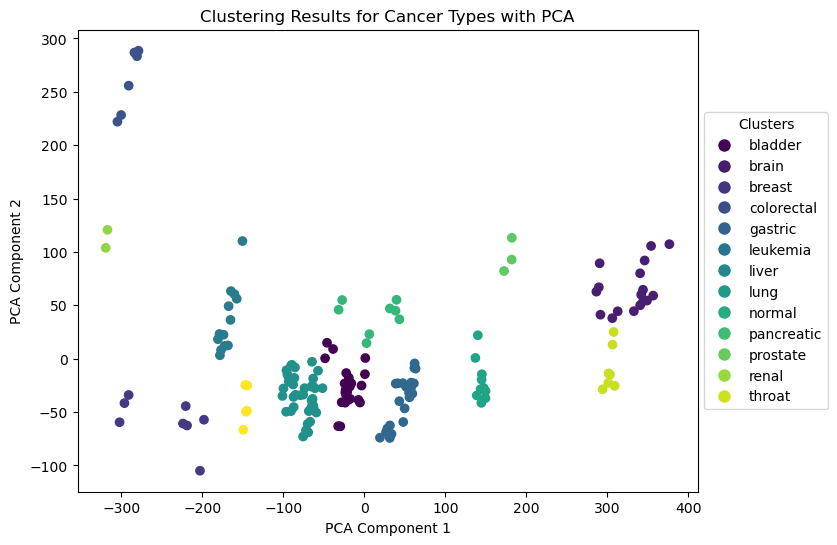

In [113]:
plt.figure(figsize = (8, 6))
scatter = plt.scatter(cluster_data_2[:, 0], cluster_data_2[:, 1], c = pca2_types_clustered, cmap = 'viridis')
legend_labels = np.unique(ground_truth)
colors = [scatter.cmap(i / len(legend_labels)) for i in range(len(legend_labels))]
handles = [Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10, label = label) for color, label in zip(colors, legend_labels)]
plt.legend(handles = handles, title = "Clusters", loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Clustering Results for Cancer Types with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

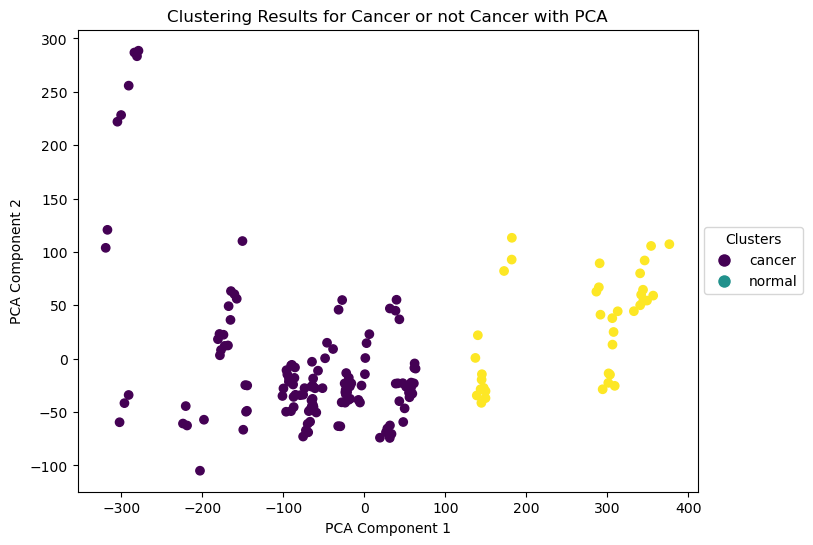

In [117]:
plt.figure(figsize = (8, 6))
scatter = plt.scatter(cluster_data_2[:, 0], cluster_data_2[:, 1], c = pca2_cancer_clustered, cmap = 'viridis')
legend_labels_cancer = np.unique(cancer_classifier)
colors = [scatter.cmap(i / len(legend_labels_cancer)) for i in range(len(legend_labels_cancer))]
handles = [Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10, label = label) for color, label in zip(colors, legend_labels_cancer)]
plt.legend(handles = handles, title = "Clusters", loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Clustering Results for Cancer or not Cancer with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()